##### This experiment is inspired from one of the Veritasium's videos. Link :- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from statistics import mean

In [19]:
plt.style.use('ggplot')

#### Giving 95% weightage to Skills ( hardwork + skill + experience ) and only 5 % to Luck.

In [2]:
def generate_result(population):
    result = []
    for i in range (population):
        skill = random.random()
        luck = random.random()
        res = 0.95 *skill + 0.05 * luck
        result.append([res, luck])
    return result

In [3]:
def final_result(population, cutoff):
    average_luck = less_lucky_count= medium_lucky_count = highly_lucky = 0
    for i in range(100):
        result = generate_result(population)
        result = sorted(result,key=lambda x: x[0], reverse=True)

        all_lucks = [i[1] for i in result[:cutoff]]
        average_luck += mean(all_lucks)
        less_lucky_count += len(list(filter(lambda x: x < 0.5, all_lucks)))
        medium_lucky_count += len(list(filter(lambda x: x >= 0.5 and x < 0.75, all_lucks)))
        highly_lucky += len(list(filter(lambda x: x >= 0.75, all_lucks)))

    return average_luck/100,less_lucky_count/100,medium_lucky_count/100, highly_lucky/100


In [4]:
sample_population = [250,500,1000,2000,4000, 80000]
no_of_selection = 15
average_luck_dict = {}
less_lucky_count_dict = {}
medium_lucky_count_dict = {}
high_lucky_count_dict = {}

for population in sample_population:

    # after 100 experiments for each population :-
    average_luck, average_less_lucky_count, average_medium_lucky_count, average_high_lucky_count = final_result(population,no_of_selection)

    average_luck_dict[population] = average_luck
    less_lucky_count_dict[population] = average_less_lucky_count
    medium_lucky_count_dict[population] = average_medium_lucky_count
    high_lucky_count_dict[population] = average_high_lucky_count

In [5]:
average_luck_dict, less_lucky_count_dict, medium_lucky_count_dict, high_lucky_count_dict

({250: 0.5693185732446291,
  500: 0.637018404056112,
  1000: 0.7457596588861602,
  2000: 0.8131890098634443,
  4000: 0.8742579664769743,
  80000: 0.9719233765430905},
 {250: 5.83, 500: 4.29, 1000: 1.95, 2000: 0.18, 4000: 0.0, 80000: 0.0},
 {250: 4.18, 500: 4.85, 1000: 4.54, 2000: 4.46, 4000: 1.67, 80000: 0.0},
 {250: 4.99, 500: 5.86, 1000: 8.51, 2000: 10.36, 4000: 13.33, 80000: 15.0})

1. Relationship between the no of people and luck

In [24]:
labels = list(average_luck_dict.keys())
labels = list(map(lambda x : str(x),labels))
average_luck_per_populations = list(average_luck_dict.values())
average_luck_per_populations = list(map(lambda x : x*100,average_luck_per_populations))
average_luck_per_populations

[56.93185732446291,
 63.7018404056112,
 74.57596588861603,
 81.31890098634443,
 87.42579664769742,
 97.19233765430904]

In [1]:
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

def line_plot(ax, x, y1, y1_label, x_label, y_label, title, yticks=None, color = 'b'):
    ax.plot(x,y1,marker='o',color=color, label=y1_label)
    # ax.plot(x,y2,marker='o',color='r', label=y2_label)

    ax.set_xlabel(x_label,fontdict=fontdict,labelpad=20)
    ax.set_ylabel(y_label,fontdict=fontdict,labelpad=20)

    if yticks:
        ax.set_yticks(yticks)
        
    ax.set_xticks(np.arange(len(x)),x,weight = 'bold')
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.set_title(title, pad=15, fontdict=title_fontdict,loc="left")

    ax.legend()

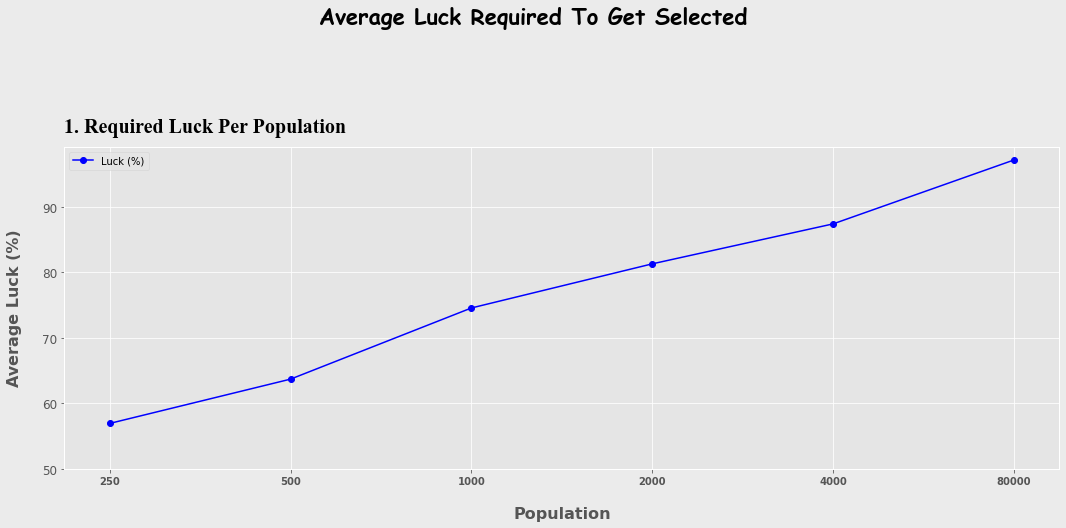

In [54]:

fig,ax1 = plt.subplots(1,1,figsize=(16,8),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# ax1
yticks_1 = [i for i in range(50,100,10)] 
line_plot(ax1,labels,average_luck_per_populations,"Luck (%)","Population","Average Luck (%)","1. Required Luck Per Population",yticks_1)


fig.suptitle('Average Luck Required To Get Selected',fontweight = "bold",fontname="Cursive",fontsize=22,)
fig.tight_layout(pad=5.0)
plt.show()

2. Presence of less lucky people vs highly lucky people in each population selection, and a conclusive relationship

In [55]:
less_lucky = list(less_lucky_count_dict.values())
very_lucky = list(high_lucky_count_dict.values())
less_lucky, very_lucky

([5.83, 4.29, 1.95, 0.18, 0.0, 0.0], [4.99, 5.86, 8.51, 10.36, 13.33, 15.0])

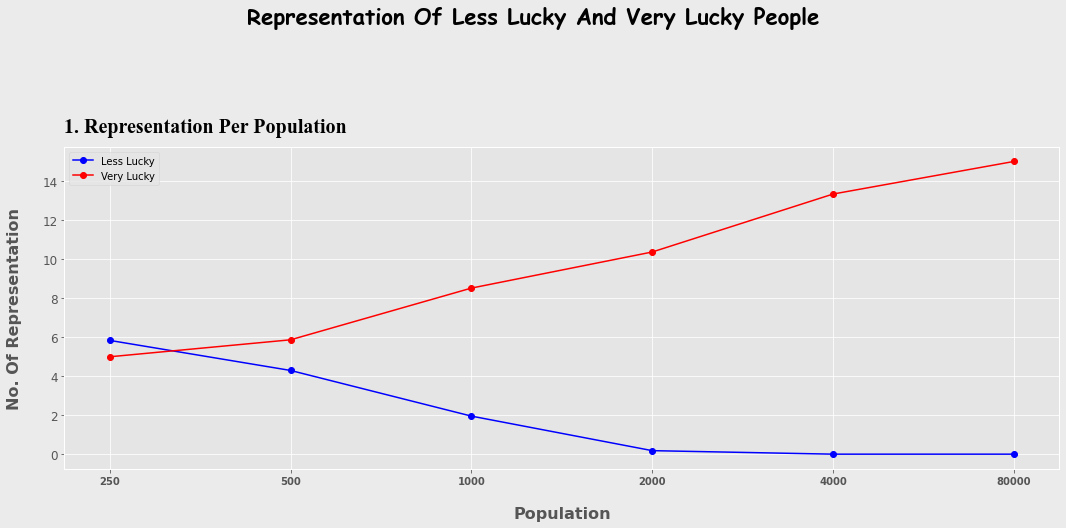

In [56]:
fig, ax1 = plt.subplots(1,1,figsize=(16,8),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# ax1
yticks_1 = [i for i in range(0,16,2)] 
line_plot(ax1,labels,less_lucky,"Less Lucky","Population","No. Of Representation","1. Representation Per Population",yticks_1, color='b')

# ax2
line_plot(ax1,labels,very_lucky,"Very Lucky","Population","No. Of Representation","1. Representation Per Population", color='r')

fig.suptitle('Representation Of Less Lucky And Very Lucky People',fontweight = "bold",fontname="Cursive",fontsize=22,)
fig.tight_layout(pad=5.0)
plt.show()